# Logistic Regression

Logistic regression is a classification algorithm used in supervised learning to estimate the probability of a target variable. The response variable in this specific project is binary, meaning it has only two possible classes, $Y ∈ {0, 1}$ .

This model predicts the probability $P(Y = 1)$ based on the input variable $x$. In addition, the logistic regression implies that the log-odds are linear, which means that the decision boundary is linear.

Before applying this model to the data set, there are several assumptions that should be taken into consideration:

* Independence of errors

* Linearity in the logit for continuous variables

* Absence of multicollinearity

* Lack of strongly influential outliers

## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Import Data

In [2]:
X_train = pd.read_csv('0_X_train.csv', index_col='Id')
X_valid = pd.read_csv('1_X_valid.csv', index_col='Id')
X_test  = pd.read_csv('2_X_test.csv', index_col='Id')
y_train = pd.read_csv('0_y_train.csv', index_col='Id')
y_valid = pd.read_csv('1_y_valid.csv', index_col='Id')
y_test  = pd.read_csv('2_y_test.csv', index_col='Id')

num_vars = ['age', 'time_spent', 'banner_views', 'banner_views_old', 'days_elapsed_old', 'X4']

In [3]:
# Dropping one columns of dummies to prevent multicollinearity
X_train = X_train.drop(columns=['marital_married', 'outcome_old_failure', 'job_manager'])
X_valid = X_valid.drop(columns=['marital_married', 'outcome_old_failure', 'job_manager'])
X_test  = X_test.drop(columns=['marital_married', 'outcome_old_failure', 'job_manager'])

In [4]:
# Prior analysis due to multicollinearity
vif_train = X_train.drop(columns=['age', 'outcome_old_na', 'X4', 'month'])
vif_valid = X_train.drop(columns=['age', 'outcome_old_na', 'X4', 'month'])
vif_test = X_train.drop(columns=['age', 'outcome_old_na', 'X4', 'month'])

In [5]:
# Column transform by standarizing through the pipeline
std_num = ColumnTransformer(transformers = [('std_num', StandardScaler(), num_vars)],
                            remainder = 'passthrough')

In [6]:
# Define the pipeline
logistic_pipe = Pipeline([
    ('std_num', std_num),
    ('logistic_log', LogisticRegression(penalty = 'l2', solver = 'liblinear', C = 1, fit_intercept = True, class_weight = 'balanced'))
])

In [7]:
# Create a numpy array for y_train so that the methods can appropriately read the data
y_train = np.array(y_train)
y_train = y_train.ravel()

In [8]:
logistic_grid = np.linspace(start = 0.0001, stop = 0.2, num = 100)
param_grid = {'logistic_log__C': logistic_grid}

logCV = GridSearchCV(estimator = logistic_pipe,
                       param_grid = param_grid,
                       scoring = "accuracy",
                       cv = KFold(n_splits = 10, shuffle = True, random_state = 34),
                       n_jobs = -2)

logCV.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=34, shuffle=True),
             estimator=Pipeline(steps=[('std_num',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('std_num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'time_spent',
                                                                          'banner_views',
                                                                          'banner_views_old',
                                                                          'days_elapsed_old',
                                                                          'X4'])])),
                                       ('logistic_log',
                                    

In [9]:
pd.DataFrame(logCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic_log__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028277,0.002459,0.006082,0.000995,0.0001,{'logistic_log__C': 0.0001},0.743222,0.744817,0.709729,0.740032,0.685805,0.717703,0.765176,0.749201,0.739617,0.726837,0.732214,0.021610,100
1,0.028534,0.003497,0.006200,0.000914,0.002119,{'logistic_log__C': 0.002119191919191919},0.802233,0.813397,0.795853,0.797448,0.771930,0.779904,0.838658,0.806709,0.801917,0.800319,0.800837,0.017135,99
2,0.026721,0.002550,0.005808,0.001181,0.004138,{'logistic_log__C': 0.004138383838383839},0.811802,0.821372,0.808612,0.802233,0.783094,0.794258,0.840256,0.805112,0.811502,0.813099,0.809134,0.014527,98
3,0.030305,0.001981,0.006094,0.001238,0.006158,{'logistic_log__C': 0.006157575757575758},0.813397,0.816587,0.810207,0.807018,0.789474,0.794258,0.833866,0.813099,0.811502,0.811502,0.810091,0.011474,97
4,0.028837,0.002901,0.005402,0.001016,0.008177,{'logistic_log__C': 0.008176767676767676},0.814992,0.830941,0.808612,0.807018,0.791069,0.795853,0.840256,0.813099,0.808307,0.816294,0.812644,0.013894,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.037830,0.002247,0.005338,0.001432,0.191923,{'logistic_log__C': 0.19192323232323233},0.819777,0.827751,0.818182,0.819777,0.807018,0.795853,0.849840,0.808307,0.816294,0.819489,0.818229,0.013509,63
96,0.038230,0.002544,0.006161,0.001042,0.193942,{'logistic_log__C': 0.19394242424242425},0.819777,0.827751,0.818182,0.819777,0.807018,0.795853,0.849840,0.808307,0.816294,0.819489,0.818229,0.013509,63
97,0.040176,0.004372,0.005184,0.001005,0.195962,{'logistic_log__C': 0.19596161616161614},0.819777,0.827751,0.818182,0.819777,0.807018,0.795853,0.849840,0.808307,0.816294,0.819489,0.818229,0.013509,63
98,0.041458,0.003931,0.005239,0.000717,0.197981,{'logistic_log__C': 0.19798080808080806},0.819777,0.827751,0.818182,0.819777,0.807018,0.795853,0.849840,0.808307,0.816294,0.819489,0.818229,0.013509,63


In [10]:
# Choose best model that minimizes cv_err
mean_scores = logCV.cv_results_["mean_test_score"]
std_scores = logCV.cv_results_["std_test_score"] / np.sqrt(logCV.n_splits_)
C_values = logCV.cv_results_["param_logistic_log__C"].data

best_index = np.argmax(mean_scores)
max_C_log = C_values[best_index]
threshold_log = mean_scores[best_index] - std_scores[best_index]
one_std_rule_C_log = np.max(C_values[mean_scores <= threshold_log])

print("Minimum C:", max_C_log)
print("1-SD C:", one_std_rule_C_log)
print("Best score for logistic:", np.max(mean_scores))

Minimum C: 0.06673333333333334
1-SD C: 0.014234343434343434
Best score for logistic: 0.8195046139892282


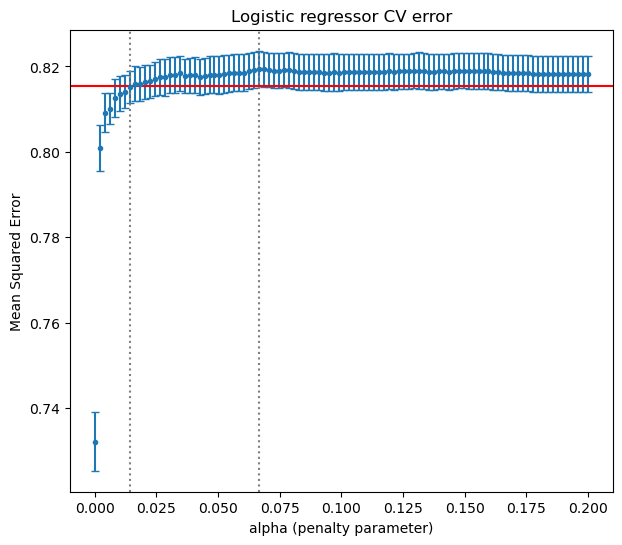

In [11]:
plt.figure(figsize=(7,6))
plt.errorbar(x = C_values, y = mean_scores, yerr = std_scores, fmt = '.', capsize = 3)

plt.axvline(x = max_C_log, ls = 'dotted', color = "grey")  # Vertical line at the k yielding minimum CV MSE
plt.axvline(x = one_std_rule_C_log, ls = 'dotted', color = "grey")   # Vertical line at best k value according to 1 std err rule
plt.axhline(y = threshold_log, color = "red")  # Horizontal line line at best k value according to 1 std err rule

plt.title("Logistic regressor CV error")
plt.xlabel('alpha (penalty parameter)')
plt.ylabel('Mean Squared Error')
plt.show()

In [12]:
# Fit pipeline to training data
logistic_pipe.fit(X_train, y_train) # Fit it to the training data 

# Predict pipeline to training data
y_train_pred = logistic_pipe.predict(X_train) # Predict the class labels for the training data
acc = accuracy_score(y_train, y_train_pred) # Calculate the accuracy of the predictions 
print("Logistic --- Accuracy on training:",  np.round(acc, 3))

# Predict pipeline to validation data
y_valid_pred = logistic_pipe.predict(X_valid) # Predict the class labels for the test data
acc = accuracy_score(y_valid, y_valid_pred) # Calculate the accuracy of the predictions 
print("Logistic --- Accuracy on validation:", np.round(acc, 3))

# Predict pipeline to test data
y_test_pred = logistic_pipe.predict(X_test) # Predict the class labels for the test data
acc = accuracy_score(y_test, y_test_pred) # Calculate the accuracy of the predictions 
print("Logistic --- Accuracy on test:", np.round(acc, 3))

Logistic --- Accuracy on training: 0.822
Logistic --- Accuracy on validation: 0.811
Logistic --- Accuracy on test: 0.819


There will be no further analysis of this model since its performance is not as high as other models that have been tested.

### Resources

* https://www.tutorialspoint.com/machine_learning_with_python/classification_algorithms_logistic_regression.htm

* https://pubmed.ncbi.nlm.nih.gov/21996075/#:~:text=Basic%20assumptions%20that%20must%20be,lack%20of%20strongly%20influential%20outliers. 

* 11_Logistic_Regression.pdf